<a href="https://www.kaggle.com/code/fejnrenrjen/eda-on-housing-supply-vancouver?scriptVersionId=101054269" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-affordability-in-canada/Structural-dwellings-household-size.csv
/kaggle/input/housing-affordability-in-canada/HPI 1981-2022 federal and provincial.csv
/kaggle/input/housing-affordability-in-canada/population_dwellings_count.csv
/kaggle/input/housing-affordability-in-canada/Interest and mortgage rates 1951-2022.csv
/kaggle/input/housing-affordability-in-canada/population-by-region-1946-2022.csv
/kaggle/input/housing-affordability-in-canada/CPI-inflation-by-region-1914-202.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-price-rental.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/ottawa_section1_.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/saguenay_section1_.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/calgary_section1_.csv
/kaggle/input/housing-affordability-in-canada/housing-supply

In [2]:
#read the data in pandas format
vancouver_df =pd.read_csv('/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/vancouver_section1_.csv')
vancouver_df.head()

,Unnamed: 0,"Starts, total",Single-detached,Multiple,Semi-detached,Row,Apartment,"Starts by intended market, total",Homeownership - freehold,Rental,...,Rental accommodation costs (% change)4,Bachelor,One-bedroom,Two-bedroom,3+ bedroom,"Population on July 1 (thousands)3,5",Labour force participation rate (%)3,Employment (% change)4,Unemployment rate (%)3,"Net migration4,6"
0,1990,17970,6316,11654,607,3047,8000,17970,6425,1895,...,6.44539614561027,472,566,751,876,1608.288,0,0,0,0
1,1991,14769,6991,7778,430,1429,5919,14769,7080,1738,...,4.22450211225105,472,585,752,896,1646.854,0,0,0,0
2,1992,18684,7603,11081,770,2542,7769,18684,7759,1901,...,2.3547577687705,480,594,771,902,1691.289,0,0,0,0
3,1993,21307,6593,14714,929,2340,11445,21307,6899,1435,...,1.99886856496324,494,611,790,935,1736.726,0,0,0,0
4,1994,20473,6345,14128,822,2672,10634,20473,6627,1181,...,1.75633203919393,513,623,812,957,1792.984,0,0,0,0


In [3]:
#checking the columns
vancouver_df.columns

Index(['Unnamed: 0', 'Starts, total', '  Single-detached', '  Multiple',
       '     Semi-detached', '     Row', '     Apartment',
       'Starts by intended market, total', '  Homeownership - freehold',
       '  Rental', '  Homeownership - condominium',
       '  Other (co-op and unknown)', 'Completions, total',
       'Residential Building Permits4',
       'Residential Building Permits($) (thousands)4',
       'Newly completed and unabsorbed homes1',
       '     Single- and semi-detached', '     Row and apartment',
       'Rental vacancy rate (%)2', 'Rental availability rate (%)2',
       'Vacancy Rate (Standard Spaces) in Seniors' Rental 8',
       'Vacancy Rate of Rented Condominium Apartments ',
       'New Housing Price Index (% change)4',
       'Teranet - National Bank House Price Index (% change)7',
       'Consumer Price Index (% change)4',
       'Owned accommodation costs (% change)4',
       'Rental accommodation costs (% change)4', '  Bachelor', ' One-bedroom',
      

In [4]:
#check whether the head and tail of the pandas dataframe are consistent
vancouver_df.tail()

,Unnamed: 0,"Starts, total",Single-detached,Multiple,Semi-detached,Row,Apartment,"Starts by intended market, total",Homeownership - freehold,Rental,...,Rental accommodation costs (% change)4,Bachelor,One-bedroom,Two-bedroom,3+ bedroom,"Population on July 1 (thousands)3,5",Labour force participation rate (%)3,Employment (% change)4,Unemployment rate (%)3,"Net migration4,6"
24,2014,19212,4374,14838,508,2719,11611,19212,4354,3286,...,1.05697531311083,902,1038,1311,1542,2481.896,64.7,2.30041680025649,5.8,28344
25,2015,20863,4622,16241,486,2512,13243,20863,4454,3810,...,1.06741170570957,937,1079,1368,1615,2507.42,64.7,1.73940296168612,5.9,16711
26,2016,27914,5169,22745,430,3398,18917,27914,4757,6841,...,1.22625460731499,1013,1159,1450,1631,2548.74,66.4,4.67462456680785,5.4,25294
27,category,construction,construction,construction,construction,construction,construction,construction,construction,construction,...,housingcosts,averagerent,averagerent,averagerent,averagerent,demandinfluences,demandinfluences,demandinfluences,demandinfluences,demandinfluences
28,state,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,...,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver


In [5]:
len(vancouver_df)

29

In [6]:
len(vancouver_df.drop_duplicates())

29

In [7]:
#review the data types of each column
vancouver_df.dtypes

Unnamed: 0                                               object
Starts, total                                            object
  Single-detached                                        object
  Multiple                                               object
     Semi-detached                                       object
     Row                                                 object
     Apartment                                           object
Starts by intended market, total                         object
  Homeownership - freehold                               object
  Rental                                                 object
  Homeownership - condominium                            object
  Other (co-op and unknown)                              object
Completions, total                                       object
Residential Building Permits4                            object
Residential Building Permits($) (thousands)4             object
Newly completed and unabsorbed homes1   

In [8]:
#renaming columns so as to easier to use the names later-on
vancouver_df_col_modified = vancouver_df.rename({'Unnamed: 0' : 'year',
                            'Starts, total' : 'total_dwelling',
                            '  Single-detached' : 'single_detached',
                            '  Multiple': 'multiple',
                            '     Semi-detached' : 'semi_detached',
                            '     Row' :'row', 
                            '     Apartment':'apartment', 
                            'Starts by intended market, total' : 'total_dwelling_market', 
                            '  Homeownership - freehold' : 'homeownership_freehold',
                            '  Rental' : 'rental', 
                            '  Homeownership - condominium' : 'homeownership_condo',
                            '  Other (co-op and unknown)' : 'other',  
                            'Completions, total' : 'completed',
                            'Residential Building Permits4' : 'res_building_permit',
                            'Residential Building Permits($) (thousands)4' : 'res_building_permit_amount',
                            'Newly completed and unabsorbed homes1' : 'completed_but_unabsorbed_homes',
                            '     Single- and semi-detached' : 'new_single_and_semi_detached',      
                            '     Row and apartment'  : 'new_rows_and_apartment', 
                            'Rental vacancy rate (%)2' : 'rental_vacancy_rate', 
                            'Rental availability rate (%)2' : 'rental_avilability_rate', 
                            '  Bachelor' :'bachelor',
                            'Population on July 1 (thousands)3,5' : 'population',
                            'Labour force participation rate (%)3' : 'labour_participation_rate',
                            'Employment (% change)4' : 'employment_change',
                            'Unemployment rate (%)3' : 'unemployment_rate',
                            'Net migration4,6' : 'migration'}, axis = 'columns')

In [9]:
#Confirm the rename columns
vancouver_df_col_modified.head()

,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,rental,...,Rental accommodation costs (% change)4,bachelor,One-bedroom,Two-bedroom,3+ bedroom,population,labour_participation_rate,employment_change,unemployment_rate,migration
0,1990,17970,6316,11654,607,3047,8000,17970,6425,1895,...,6.44539614561027,472,566,751,876,1608.288,0,0,0,0
1,1991,14769,6991,7778,430,1429,5919,14769,7080,1738,...,4.22450211225105,472,585,752,896,1646.854,0,0,0,0
2,1992,18684,7603,11081,770,2542,7769,18684,7759,1901,...,2.3547577687705,480,594,771,902,1691.289,0,0,0,0
3,1993,21307,6593,14714,929,2340,11445,21307,6899,1435,...,1.99886856496324,494,611,790,935,1736.726,0,0,0,0
4,1994,20473,6345,14128,822,2672,10634,20473,6627,1181,...,1.75633203919393,513,623,812,957,1792.984,0,0,0,0


In [10]:
#determining the shape of the column
vancouver_df_col_modified.shape

(29, 36)

In [11]:
#want to remove the last 2 rows of the dataframe
vancouver_df_col_modified.tail()

,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,rental,...,Rental accommodation costs (% change)4,bachelor,One-bedroom,Two-bedroom,3+ bedroom,population,labour_participation_rate,employment_change,unemployment_rate,migration
24,2014,19212,4374,14838,508,2719,11611,19212,4354,3286,...,1.05697531311083,902,1038,1311,1542,2481.896,64.7,2.30041680025649,5.8,28344
25,2015,20863,4622,16241,486,2512,13243,20863,4454,3810,...,1.06741170570957,937,1079,1368,1615,2507.42,64.7,1.73940296168612,5.9,16711
26,2016,27914,5169,22745,430,3398,18917,27914,4757,6841,...,1.22625460731499,1013,1159,1450,1631,2548.74,66.4,4.67462456680785,5.4,25294
27,category,construction,construction,construction,construction,construction,construction,construction,construction,construction,...,housingcosts,averagerent,averagerent,averagerent,averagerent,demandinfluences,demandinfluences,demandinfluences,demandinfluences,demandinfluences
28,state,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,...,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver,vancouver


In [12]:
#REMOVING THE LAST TWO ROWS OF THE DATAFRAME
vancouver_df_col_modified.drop([27,28], axis=0, inplace=True)

In [13]:
vancouver_df_col_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 36 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   year                                                   27 non-null     object
 1   total_dwelling                                         27 non-null     object
 2   single_detached                                        27 non-null     object
 3   multiple                                               27 non-null     object
 4   semi_detached                                          27 non-null     object
 5   row                                                    27 non-null     object
 6   apartment                                              27 non-null     object
 7   total_dwelling_market                                  27 non-null     object
 8   homeownership_freehold                                 27 non-

In [14]:
#Change the datatype of all columns to float
vancouver_df_col_modified= vancouver_df_col_modified.astype(float)


In [15]:
#now all columns are in float64 value in order to do correlation
vancouver_df_col_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 36 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   year                                                   27 non-null     float64
 1   total_dwelling                                         27 non-null     float64
 2   single_detached                                        27 non-null     float64
 3   multiple                                               27 non-null     float64
 4   semi_detached                                          27 non-null     float64
 5   row                                                    27 non-null     float64
 6   apartment                                              27 non-null     float64
 7   total_dwelling_market                                  27 non-null     float64
 8   homeownership_freehold                              

In [16]:
#doublecheck whether the last rows are as consistent as the first row
vancouver_df_col_modified.tail()

,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,rental,...,Rental accommodation costs (% change)4,bachelor,One-bedroom,Two-bedroom,3+ bedroom,population,labour_participation_rate,employment_change,unemployment_rate,migration
22,2012.0,19027.0,3381.0,15646.0,480.0,2389.0,12777.0,19027.0,5655.0,1277.0,...,1.491313,864.0,982.0,1261.0,1480.0,2411.326,66.1,1.853969,6.8,28746.0
23,2013.0,18696.0,4004.0,14692.0,510.0,2373.0,11809.0,18696.0,3840.0,3149.0,...,1.484094,876.0,1005.0,1281.0,1498.0,2444.333,64.9,0.040093,6.6,23539.0
24,2014.0,19212.0,4374.0,14838.0,508.0,2719.0,11611.0,19212.0,4354.0,3286.0,...,1.056975,902.0,1038.0,1311.0,1542.0,2481.896,64.7,2.300417,5.8,28344.0
25,2015.0,20863.0,4622.0,16241.0,486.0,2512.0,13243.0,20863.0,4454.0,3810.0,...,1.067412,937.0,1079.0,1368.0,1615.0,2507.420,64.7,1.739403,5.9,16711.0
26,2016.0,27914.0,5169.0,22745.0,430.0,3398.0,18917.0,27914.0,4757.0,6841.0,...,1.226255,1013.0,1159.0,1450.0,1631.0,2548.740,66.4,4.674625,5.4,25294.0


In [17]:
#checking the null values
vancouver_df_col_modified.isnull().values.any()

False

In [18]:
#checking the null values
vancouver_df_col_modified.isnull().sum().sum()

0

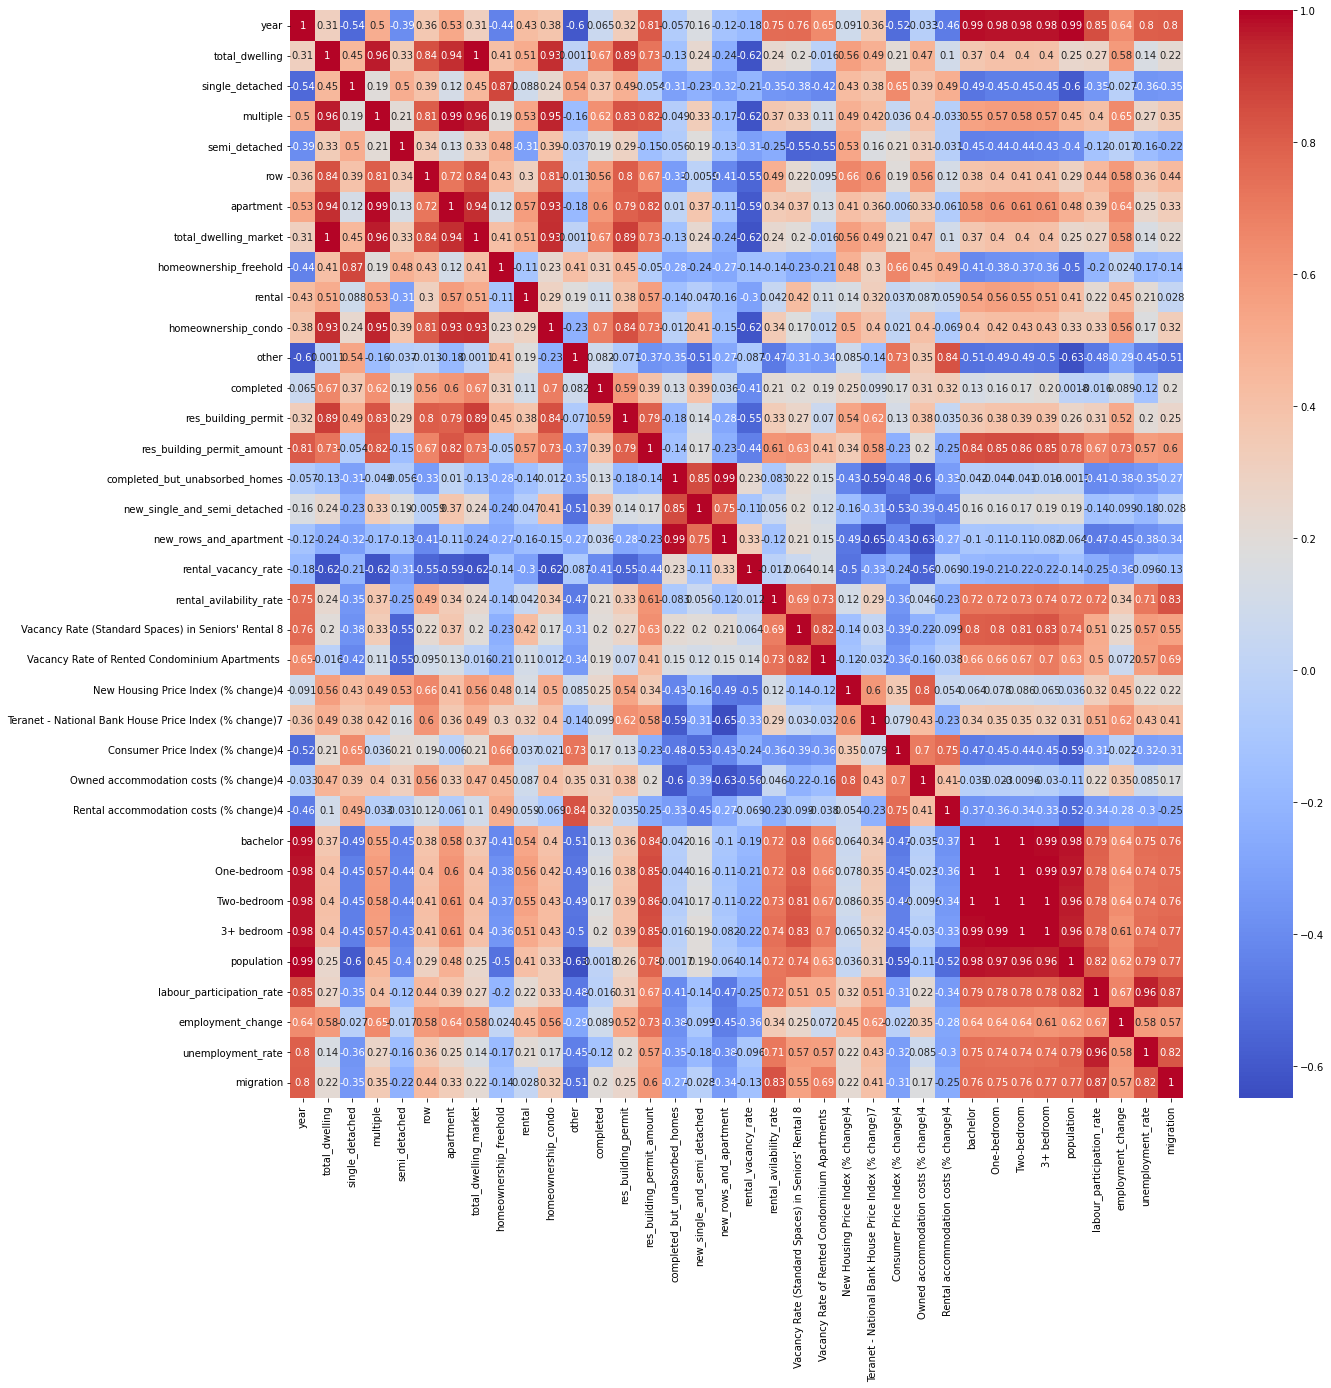

In [19]:
#correlation matrix as ususal
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(vancouver_df_col_modified.corr(),annot=True,cmap='coolwarm')
plt.savefig('heatmap.png')

#### It is quite hard to distinguish which column contributes correlation to related column as the values are tight in the grids.I have defined a function down below to see the correlation clearly. let me know if I can improve on correlation viz so that we can see clearly the correlation.

In [20]:
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot

In [21]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



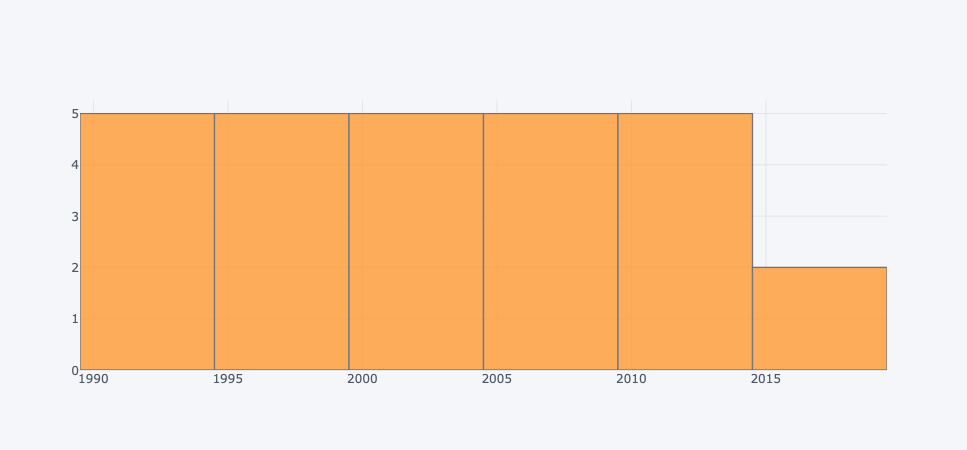

In [22]:
#trying to plot year built histogram
vancouver_df_col_modified['year'].iplot(kind='hist')

In [23]:
vancouver_df_col_modified[' One-bedroom']

0      566.0
1      585.0
2      594.0
3      611.0
4      623.0
5      640.0
6      661.0
7      672.0
8      675.0
9      683.0
10     695.0
11     726.0
12     743.0
13     759.0
14     774.0
15     788.0
16     816.0
17     846.0
18     880.0
19     919.0
20     940.0
21     964.0
22     982.0
23    1005.0
24    1038.0
25    1079.0
26    1159.0
Name:  One-bedroom, dtype: float64

Text(0.5, 1.0, 'BARPLOT BETWEEN ONE BEDROOM AND PRICES')

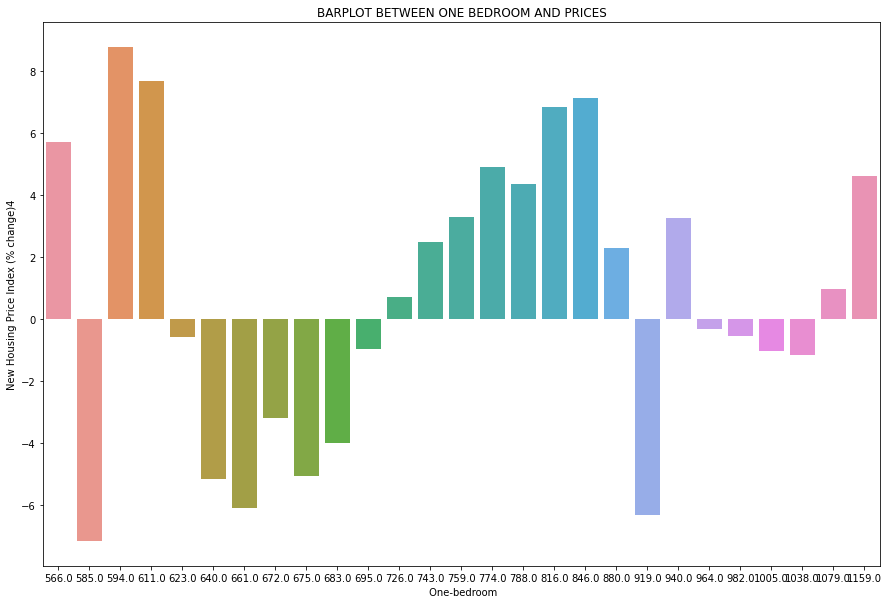

In [24]:
#barplot for one-bedroom and price index
plt.figure(figsize=(15,10))
sns.barplot(x=' One-bedroom',y='New Housing Price Index (% change)4',data=vancouver_df_col_modified)
plt.title('BARPLOT BETWEEN ONE BEDROOM AND PRICES')

#### I have created barplot between one-bedroom and housing price index. From my understanding, I want to find whether there is sth between number of bedrooms and house prices. Like if no. of bedrooms increases, then housing price increases? Let me know how I can improve further.

Text(0.5, 1.0, 'Normal Distribution of Housing Price Index')

<Figure size 864x288 with 0 Axes>

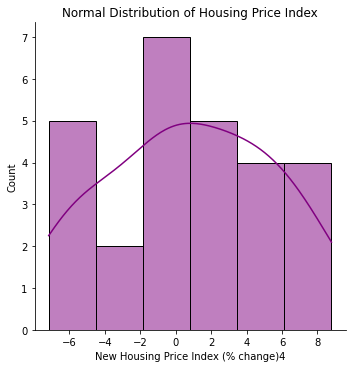

In [25]:
#Normal Distribution of housing price index
plt.figure(figsize=(12,4))
sns.displot(vancouver_df_col_modified['New Housing Price Index (% change)4'],color='purple',kde=True)
plt.title('Normal Distribution of Housing Price Index')

#### I have found that normal distribution is also one of the important params to analyze our dataset. However, I don't know how to interpret the above plot.You can add on what is going on here.

#### As I cannot clearly see the correlation graph earlier, I have made the function here in order to see the correlated columns.

In [26]:
#correlation of a column
def corr_of_a_column(df,column_name,how_many=None,ax=None):
    how_many = len(df)if how_many == None else how_many
    cor = df.corr()[[column_name]].sort_values(by=column_name,ascending=False)[:how_many]
    print(cor)
    sns.heatmap(cor,annot=True,cmap=sns.cubehelix_palette(start=.5,rot=-.5,as_cmap=True),ax=ax)
    

                                                        year
year                                                1.000000
population                                          0.994157
bachelor                                            0.985567
 One-bedroom                                        0.980674
 Two-bedroom                                        0.979551
3+ bedroom                                          0.976008
labour_participation_rate                           0.845559
res_building_permit_amount                          0.812968
migration                                           0.802240
unemployment_rate                                   0.799111
Vacancy Rate (Standard Spaces) in Seniors' Rent...  0.758473
rental_avilability_rate                             0.754606
Vacancy Rate of Rented Condominium Apartments       0.646121
employment_change                                   0.640904
apartment                                           0.525058
multiple                

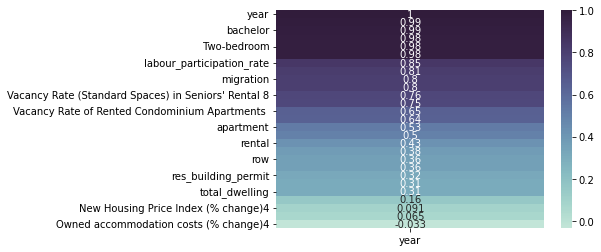

In [27]:
corr_of_a_column(vancouver_df_col_modified, 'year')

#### I have also made some data vizs here also. I will add in comment tomorrow whether there is some relations between the columns

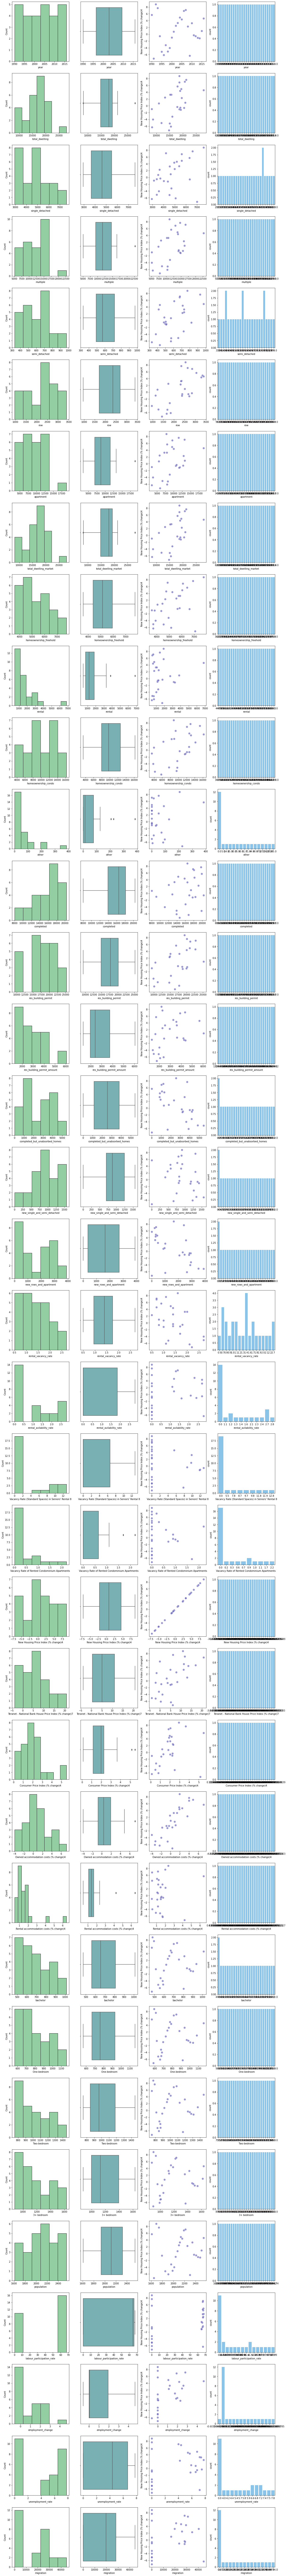

In [28]:
def plot_base_relation(df, figsize=(20, 200)):
    columns = df.columns.tolist()
    _, axs = plt.subplots(len(columns), 4, figsize=figsize)
    
    for idx, column in enumerate(columns):
        # To get distribution of data
        sns.histplot(
            x=df[column],
            kde=False,
            color='#65b87b', alpha=.7,
            ax=axs[idx][0]
        )

        # To get knowledge about outliers
        sns.boxplot(
            x=df[column],
            color='#6fb9bd',
            ax=axs[idx][1]
        )

        # To get its realtion with HousingPriceIndex
        sns.scatterplot(
            x=column, y='New Housing Price Index (% change)4', data=df,
            color='#706dbd', alpha=.7, s=80,
            ax=axs[idx][2]
        )
        
        # To get count plot for `column`
        sns.countplot(
            x=column, data=df,
            color='#42b0f5', alpha=.7,
            ax=axs[idx][3]
        )
        
        
plot_base_relation(vancouver_df_col_modified)

In [29]:
# Removing outliers using IQR method
def rm_outliers_in_col_using_iqr(df, col):
    # col here is df.column_name (or df[column_name])

    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    outliers_row_idx = col.loc[
        (col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR))
    ].index.tolist()

    df = df.drop(outliers_row_idx, axis='rows')
    return (outliers_row_idx, df)

In [52]:
import scipy.stats as stats

In [30]:
rm_outliers_in_col_using_iqr(vancouver_df_col_modified,vancouver_df_col_modified['population'])

([],
       year  total_dwelling  single_detached  multiple  semi_detached     row  \
 0   1990.0         17970.0           6316.0   11654.0          607.0  3047.0   
 1   1991.0         14769.0           6991.0    7778.0          430.0  1429.0   
 2   1992.0         18684.0           7603.0   11081.0          770.0  2542.0   
 3   1993.0         21307.0           6593.0   14714.0          929.0  2340.0   
 4   1994.0         20473.0           6345.0   14128.0          822.0  2672.0   
 5   1995.0         14992.0           4526.0   10466.0          570.0  1686.0   
 6   1996.0         15453.0           5072.0   10381.0          568.0  1841.0   
 7   1997.0         15950.0           4685.0   11265.0          726.0  1800.0   
 8   1998.0         11878.0           3373.0    8505.0          656.0  1261.0   
 9   1999.0          8677.0           3568.0    5109.0          380.0   953.0   
 10  2000.0          8203.0           3132.0    5071.0          496.0  1132.0   
 11  2001.0         108

In [49]:
from sklearn.preprocessing import StandardScaler

In [47]:
# Scaling int & float dtype column
def standard_scaler(column):
    # Bumping up the ndim by np.newaxis as column.values is 1D & fit_transform needs 2D
    return StandardScaler().fit_transform(column.values[:, np.newaxis])


# Scaling all int & float dtype columns 
def scaling_df(df):
    # Selecting columns which have number dtype
    numbers_df = df.select_dtypes(include=[np.float64])

    for column_name in numbers_df.columns.tolist():
        df[column_name] = standard_scaler(df[column_name])
    return df

In [50]:
scaling_df(vancouver_df_col_modified)

,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,rental,...,Rental accommodation costs (% change)4,bachelor,One-bedroom,Two-bedroom,3+ bedroom,population,labour_participation_rate,employment_change,unemployment_rate,migration
0,-1.669046,0.272765,1.271611,-0.083637,-0.000923,1.172459,-0.327132,0.272765,1.063851,0.217243,...,4.045470,-1.357530,-1.383120,-1.294615,-1.334487,-1.860576,-1.205788,-0.801273,-1.156551,-1.045860
1,-1.540658,-0.449530,1.826729,-1.044426,-1.103714,-1.193801,-0.924836,-0.449530,1.651062,0.101568,...,2.194260,-1.357530,-1.267579,-1.289690,-1.249075,-1.716638,-1.205788,-0.801273,-1.156551,-1.045860
2,-1.412270,0.433877,2.330037,-0.225673,1.014641,0.433917,-0.393480,0.433877,2.259788,0.221664,...,0.635749,-1.305289,-1.212848,-1.196110,-1.223451,-1.550796,-1.205788,-0.801273,-1.156551,-1.045860
3,-1.283881,1.025748,1.499415,0.674880,2.005283,0.138500,0.662339,1.025748,1.488794,-0.121679,...,0.339101,-1.213868,-1.109469,-1.102530,-1.082521,-1.381214,-1.205788,-0.801273,-1.156551,-1.045860
4,-1.155493,0.837559,1.295460,0.529622,1.338625,0.624037,0.429404,0.837559,1.244945,-0.308823,...,0.136936,-1.089797,-1.036495,-0.994174,-0.988568,-1.171245,-1.205788,-0.801273,-1.156551,-1.045860
5,-1.027105,-0.399211,-0.200482,-0.378120,-0.231450,-0.817948,-0.266816,-0.399211,-0.623369,-0.686059,...,-0.160930,-0.926545,-0.933116,-0.925220,-0.813473,-0.956193,-1.205788,-0.801273,-1.156551,-1.045860
6,-0.898717,-0.295188,0.248547,-0.399190,-0.243911,-0.591267,-0.335175,-0.295188,-0.080088,-0.652167,...,0.061947,-0.809004,-0.805412,-0.831640,-0.843367,-0.752010,-1.205788,-0.801273,-1.156551,-1.045860
7,-0.770329,-0.183041,-0.069721,-0.180063,0.740501,-0.651228,-0.114877,-0.183041,-0.270147,-0.259459,...,-0.364809,-0.756763,-0.738520,-0.797164,-0.612754,-0.556238,-1.205788,-0.801273,-1.156551,-1.045860
8,-0.641941,-1.101875,-1.148708,-0.864216,0.304369,-1.439494,-0.732687,-1.101875,-1.370157,-0.811313,...,-0.579111,-0.586981,-0.720277,-0.708509,-0.783578,-0.452542,-1.205788,-0.801273,-1.156551,-1.045860
9,-0.513553,-1.824170,-0.988340,-1.706021,-1.415236,-1.889931,-1.540348,-1.824170,-1.189063,-0.451024,...,-0.902425,-0.619631,-0.671627,-0.738060,-0.834826,-0.349789,-1.205788,-0.801273,-1.156551,-1.045860


In [51]:
vancouver_df_col_modified.sample(5)

,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,rental,...,Rental accommodation costs (% change)4,bachelor,One-bedroom,Two-bedroom,3+ bedroom,population,labour_participation_rate,employment_change,unemployment_rate,migration
7,-0.770329,-0.183041,-0.069721,-0.180063,0.740501,-0.651228,-0.114877,-0.183041,-0.270147,-0.259459,...,-0.364809,-0.756763,-0.738520,-0.797164,-0.612754,-0.556238,-1.205788,-0.801273,-1.156551,-1.045860
22,1.155493,0.511274,-1.142129,0.905906,-0.792191,0.210161,1.044916,0.511274,0.373543,-0.238092,...,-0.083968,1.202259,1.146632,1.217270,1.244963,1.136559,0.823415,0.665469,0.981846,0.858484
11,-0.256776,-1.331132,-1.034394,-1.150519,-0.243911,-1.505304,-1.026225,-1.331132,-1.061760,0.825830,...,-0.357474,-0.384549,-0.410139,-0.467171,-0.548695,-0.120398,0.808066,-0.801273,0.918951,-1.045860
24,1.412270,0.553018,-0.325487,0.705618,-0.617738,0.692773,0.710018,0.553018,-0.792808,1.242116,...,-0.446007,1.450402,1.487175,1.463534,1.509741,1.399943,0.780437,1.018670,0.667375,0.831852
13,0.000000,-0.256151,0.503491,-0.433150,0.765423,0.161900,-0.568971,-0.256151,0.466780,-0.483442,...,-0.347547,-0.169056,-0.209461,-0.240608,-0.296728,0.032725,0.872534,1.252659,1.107634,0.258615
